In [1]:
!pip install -qq fastbook
import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 358kB 9.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 1.0MB 14.4MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 40kB 5.5MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 2.6MB 30.0MB/s 
ERROR: fastai 2.0.7 has requirement pandas>=1.1.0, but you'll have pandas 1.0.5 which is incompatible.


In [2]:
from fastbook import *

In [7]:
!pip install -qq fastai

# Image Classification

In [9]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [10]:
#hide
Path.BASE_PATH = path

In [11]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [12]:
(path/"images").ls()

(#7393) [Path('images/Bengal_151.jpg'),Path('images/saint_bernard_171.jpg'),Path('images/yorkshire_terrier_125.jpg'),Path('images/Birman_111.jpg'),Path('images/leonberger_45.jpg'),Path('images/Sphynx_185.jpg'),Path('images/Ragdoll_159.jpg'),Path('images/wheaten_terrier_26.jpg'),Path('images/Bombay_14.jpg'),Path('images/Abyssinian_137.jpg')...]

In [13]:
fname = (path/"images").ls()[0]

In [14]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Bengal']

In [15]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

### Checking and Debugging a DataBlock

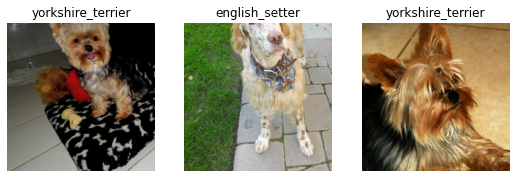

In [16]:
dls.show_batch(nrows=1, ncols=3)

### Discriminative Learning Rates

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.178721,0.381008,0.120433,00:32
1,0.519767,0.286208,0.080514,00:32
2,0.332624,0.242424,0.069012,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.263887,0.234820,0.066982,00:33
1,0.236579,0.221206,0.060217,00:34
2,0.206798,0.221366,0.060893,00:34


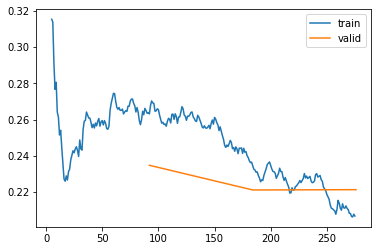

In [21]:
learn.recorder.plot_loss()

### Export Model

In [22]:
learn.export()

### Tranform Model to ONNX Format

In [23]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')
onnx_path =  "pets_model.onnx"
torch.onnx.export(learn.model, dummy_input, onnx_path, verbose=False)